In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# for clear response without warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
user_df = pd.read_csv('Users.csv',encoding='latin')
books_df = pd.read_csv('Books.csv',encoding='latin')
ratings_df = pd.read_csv('Ratings.csv',encoding='latin')

In [3]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
# Lets just clean the tables one by one

# Users Dataframe Preprocessing

In [8]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
user_df.duplicated().sum() # no duplictaes

0

In [10]:
user_df.info() # looking good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [11]:
user_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [12]:
# We can see a clear diff in UQ and Max of Age, hence outliers should be there

<Axes: xlabel='Age'>

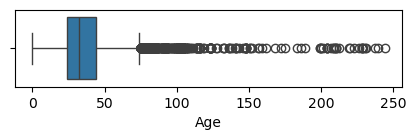

In [13]:
plt.figure(figsize=(5,1))
sns.boxplot(x=user_df.Age)  # can cleary see that

In [14]:
# Now lets check if ay column is redundant or if any changes required for columns

In [15]:
user_df.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [16]:
# it should be user_id, but as it is consistent across all sheets, lets just keep it as it is. Other naming conventions are fine

In [17]:
# lets check for values in each column

In [18]:
user_df['User-ID'].value_counts()

User-ID
1         1
185904    1
185910    1
185909    1
185908    1
         ..
92959     1
92960     1
92961     1
92962     1
278858    1
Name: count, Length: 278858, dtype: int64

In [19]:
len(user_df)   # Hence all ids are unique

278858

In [20]:
user_df.Location.value_counts()

Location
london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: count, Length: 57339, dtype: int64

In [21]:
user_df.Location.nunique()  # Fair enough

57339

In [22]:
list(user_df.Location.unique())

['nyc, new york, usa',
 'stockton, california, usa',
 'moscow, yukon territory, russia',
 'porto, v.n.gaia, portugal',
 'farnborough, hants, united kingdom',
 'santa monica, california, usa',
 'washington, dc, usa',
 'timmins, ontario, canada',
 'germantown, tennessee, usa',
 'albacete, wisconsin, spain',
 'melbourne, victoria, australia',
 'fort bragg, california, usa',
 'barcelona, barcelona, spain',
 'mediapolis, iowa, usa',
 'calgary, alberta, canada',
 'albuquerque, new mexico, usa',
 'chesapeake, virginia, usa',
 'rio de janeiro, rio de janeiro, brazil',
 'weston, ,',
 'langhorne, pennsylvania, usa',
 'ferrol / spain, alabama, spain',
 'erfurt, thueringen, germany',
 'philadelphia, pennsylvania, usa',
 'cologne, nrw, germany',
 'oakland, california, usa',
 'bellevue, washington, usa',
 'chicago, illinois, usa',
 'freiburg, baden-wuerttemberg, germany',
 'cuernavaca, alabama, mexico',
 'anchorage, alaska, usa',
 'shanghai, n/a, china',
 'portland, oregon, usa',
 'costa mesa, calif

In [23]:
# can see n/a, but its for state's field 

In [24]:
# We will just split it into city, state and country, as we may recommend something based on demographic data

In [25]:
user_df[['City', 'State', 'Country']] = user_df['Location'].str.split(',', n=2, expand=True)

# Let's remove whitespaces too
user_df['City'] = user_df['City'].str.strip()
user_df['State'] = user_df['State'].str.strip()
user_df['Country'] = user_df['Country'].str.strip()


In [26]:
user_df.head()

,User-ID,Location,Age,City,State,Country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom


In [27]:
# Now lets drop original location column too

In [28]:
user_df.drop(columns=['Location'],inplace=True)

In [29]:
user_df.head()

,User-ID,Age,City,State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


In [30]:
# Now lets check for each new column

In [31]:
user_df.City.nunique()

32759

In [32]:
list(user_df.City.unique())

['nyc',
 'stockton',
 'moscow',
 'porto',
 'farnborough',
 'santa monica',
 'washington',
 'timmins',
 'germantown',
 'albacete',
 'melbourne',
 'fort bragg',
 'barcelona',
 'mediapolis',
 'calgary',
 'albuquerque',
 'chesapeake',
 'rio de janeiro',
 'weston',
 'langhorne',
 'ferrol / spain',
 'erfurt',
 'philadelphia',
 'cologne',
 'oakland',
 'bellevue',
 'chicago',
 'freiburg',
 'cuernavaca',
 'anchorage',
 'shanghai',
 'portland',
 'costa mesa',
 'london',
 'grafton',
 'montreal',
 'san sebastian',
 'viterbo',
 'cary',
 'tonawanda',
 'santee',
 'appleton',
 'méxico',
 'black mountain',
 'berlin',
 'heidelberg',
 'vicenza',
 'rome',
 'renton',
 'braunschweig',
 'tacoma',
 'eubank',
 'cheyenne',
 'roma',
 'edmonton',
 'asheville',
 'trieste',
 'winfield',
 'kennewick',
 'nyack',
 'lyon',
 'n/a',
 'warman',
 'framingham',
 'vancouver',
 'rochester',
 'toronto',
 'gloucester',
 'wentzville',
 'amsterdam',
 'long beach',
 'charleston',
 'ottawa',
 'etobicoke',
 'santa cruz',
 'del mar',

In [33]:
# Some city values are n/a, lets check how many are they

In [34]:
len(user_df.loc[user_df.City=='n/a','City'])

439

In [35]:
# Lets check for other 2 demographic features as well

In [36]:
user_df.State.nunique()

6257

In [37]:
list(user_df.State.unique())

['new york',
 'california',
 'yukon territory',
 'v.n.gaia',
 'hants',
 'dc',
 'ontario',
 'tennessee',
 'wisconsin',
 'victoria',
 'barcelona',
 'iowa',
 'alberta',
 'new mexico',
 'virginia',
 'rio de janeiro',
 '',
 'pennsylvania',
 'alabama',
 'thueringen',
 'nrw',
 'washington',
 'illinois',
 'baden-wuerttemberg',
 'alaska',
 'n/a',
 'oregon',
 'england',
 'quebec',
 'lazio',
 'north carolina',
 'méxico city',
 'veneto',
 'rome',
 'niedersachsen',
 'kentucky',
 'wyoming',
 'friuli venezia giulia',
 'rhone',
 'saskatchewan',
 'massachusetts',
 'british columbia',
 'missouri',
 'south carolina',
 'texas',
 'georgia',
 'tehran',
 'auckland',
 'colorado',
 'idaho',
 'arizona',
 'oklahoma',
 'indiana',
 'v.n. gaia',
 'd.f.',
 'ohio',
 'michigan',
 'hessen',
 'vermont',
 'nord',
 'minnesota',
 'nebraska',
 'noord-brabant',
 'ge',
 'maryland',
 'florida',
 'australian capital territory',
 'kansas',
 'scotland',
 'islam',
 'northern territory',
 'overijssel',
 'nord of france',
 'abruzzo'

In [38]:
# Some of them are blank or n/a, lets check how many are such

In [39]:
len(user_df.loc[user_df.State=='n/a','City'])

12527

In [40]:
len(user_df.loc[user_df.State=='','City'])

3871

In [41]:
# A lot in comparison, lets check for country too

In [42]:
user_df.Country.nunique()

1259

In [43]:
list(user_df.Country.unique())

['usa',
 'russia',
 'portugal',
 'united kingdom',
 'canada',
 'spain',
 'australia',
 'brazil',
 '',
 'germany',
 'mexico',
 'china',
 'italy',
 'distrito federal',
 'france',
 'netherlands',
 'iraq',
 'finland',
 'new zealand',
 'india',
 'ghana',
 'switzerland',
 'slovenia',
 'iran',
 'peru',
 'bosnia and herzegovina',
 'vietnam',
 'sri lanka',
 'pakistan',
 'denmark',
 'belgium',
 'malaysia',
 'u.a.e',
 'turkey',
 'philippines',
 'greece',
 'colombia',
 'norway',
 'kuwait',
 'chile',
 'quit',
 'lj',
 'taiwan',
 'denmark"',
 'españa',
 'sweden',
 'argentina',
 'nigeria',
 'london',
 'bulgaria',
 'austria',
 'romania',
 'victoria, australia',
 'singapore',
 'albania',
 'egypt',
 'tunisia',
 'uzbekistan',
 'qatar',
 'syria',
 'saudi arabia',
 'indonesia',
 'sudan',
 'british columbia, canada',
 'missouri, usa',
 'somewherein space',
 'poland',
 'thailand',
 'metropolitana, chile',
 'ireland',
 'malaysia"',
 'venezuela',
 'paraguay',
 'mozambique',
 'morocco',
 'afghanistan',
 'estonia

In [44]:
len(user_df.loc[user_df.Country=='n/a','City'])

16

In [45]:
# Maybe we need to fix all

# But, it may not be appropriate state or city as it may be too granular for modeling

# So for this reason just focus on only Country for our dataset

In [46]:
# Now we need to somehow standardize all this

# Lets just simply map the data manually

In [47]:
mapping = {
    'usa': 'USA', 'u.s.a.': 'USA', 'united states': 'USA',
    'england': 'United Kingdom', 'uk': 'United Kingdom',
    'méxico': 'Mexico', 'mexico, city, mexico': 'Mexico',
    'españa': 'Spain', 'spain"': 'Spain', 'catalunya': 'Spain',
    'deutschland': 'Germany', 'germany"': 'Germany',
    'brasil': 'Brazil', 'brazil"': 'Brazil',
    'u.a.e': 'UAE', 'u.a.e"': 'UAE', 'united arab emirates': 'UAE',
}

In [48]:
# Now lets just map 
user_df['Country'] = user_df['Country'].replace(mapping)

# Replace garbage values with 'Unknown'
invalid = ['quit','lj','somewherein space','evil empire','universe','none','aaa','zzz']
user_df['Country'] = user_df['Country'].replace(invalid, 'Unknown')

# Replace blanks and n/a with Unknown
user_df['Country'] = user_df['Country'].replace(['', 'n/a', None], 'Unknown')

In [49]:
len(user_df[user_df.Country=='Unknown'])

4589

In [50]:
# So now 4589 records have Unknown country

# Note : By keeping "Unknown",we preserve those users in the dataset and still allow the model to learn from their ratings/behavior.

In [51]:
# So lets quickly drop city and state columns too

In [52]:
user_df.drop(columns=['City','State'],inplace=True)

In [53]:
user_df.head()

,User-ID,Age,Country
0,1,NaN,USA
1,2,18.0,USA
2,3,NaN,russia
3,4,17.0,portugal
4,5,NaN,united kingdom


In [54]:
user_df.Age.value_counts()

Age
24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
168.0       1
132.0       1
159.0       1
186.0       1
127.0       1
Name: count, Length: 165, dtype: int64

In [55]:
user_df.Age.nunique()

165

In [56]:
list(user_df.Age.unique())  # cant really say anything for now

[nan,
 18.0,
 17.0,
 61.0,
 26.0,
 14.0,
 25.0,
 19.0,
 46.0,
 55.0,
 32.0,
 24.0,
 20.0,
 34.0,
 23.0,
 51.0,
 31.0,
 21.0,
 44.0,
 30.0,
 57.0,
 43.0,
 37.0,
 41.0,
 54.0,
 42.0,
 50.0,
 39.0,
 53.0,
 47.0,
 36.0,
 28.0,
 35.0,
 13.0,
 58.0,
 49.0,
 38.0,
 45.0,
 62.0,
 63.0,
 27.0,
 33.0,
 29.0,
 66.0,
 40.0,
 15.0,
 60.0,
 0.0,
 79.0,
 22.0,
 16.0,
 65.0,
 59.0,
 48.0,
 72.0,
 56.0,
 67.0,
 1.0,
 80.0,
 52.0,
 69.0,
 71.0,
 73.0,
 78.0,
 9.0,
 64.0,
 103.0,
 104.0,
 12.0,
 74.0,
 75.0,
 231.0,
 3.0,
 76.0,
 83.0,
 68.0,
 119.0,
 11.0,
 77.0,
 2.0,
 70.0,
 93.0,
 8.0,
 7.0,
 4.0,
 81.0,
 114.0,
 230.0,
 239.0,
 10.0,
 5.0,
 148.0,
 151.0,
 6.0,
 101.0,
 201.0,
 96.0,
 84.0,
 82.0,
 90.0,
 123.0,
 244.0,
 133.0,
 91.0,
 128.0,
 94.0,
 85.0,
 141.0,
 110.0,
 97.0,
 219.0,
 86.0,
 124.0,
 92.0,
 175.0,
 172.0,
 209.0,
 212.0,
 237.0,
 87.0,
 162.0,
 100.0,
 156.0,
 136.0,
 95.0,
 89.0,
 106.0,
 99.0,
 108.0,
 210.0,
 88.0,
 199.0,
 147.0,
 168.0,
 132.0,
 159.0,
 186.0,
 152.0,
 102.0,

In [57]:
# Can cleary see nan, thats ok but we can see values more than 100 a lot of times

In [58]:
len(user_df[(user_df.Age > 100) | (user_df.Age < 5)])  # total 366 rows

1248

In [59]:
# We will be dealing with it in outlier detection pa

In [60]:
# Lets first check for nulls

In [61]:
user_df.isna().sum()

User-ID         0
Age        110762
Country         0
dtype: int64

In [62]:
# Age has a lot of nulls in it

In [63]:
# Lets first check how much is it of the total in percent

In [64]:
len(user_df)

278858

In [65]:
110767/len(user_df)

0.3972165044574658

In [66]:
# but wait, we do have addioitnal 1248 invalid dates

In [67]:
# Why Invalid?

# Yes, this data is actually collected in 2004 and names as book-crossing dataset

# And according to which Age is static column, so no any doubt 

In [68]:
# Coming to the point, 1248 records are totally invalid

In [69]:
(110762+1268)/len(user_df)

0.4017456913554569

In [70]:
# If we consider both kinda bad data(null and invalid), only 60% data is useful

# Even if we interpolate with median, it will be totally wrong

# That makes Age irreliable

# Yes we will loose demographic angle of the data, but its quite a good approach for better model 

# I will keep it as it is for now only for EDA purpose, will drop later before model building

In [71]:
# Now let's check for outliers

<Axes: >

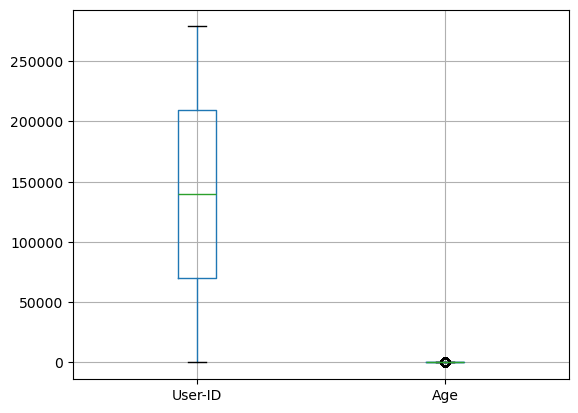

In [72]:
user_df.boxplot()

In [73]:
# Age is not reliable. As we are going to remove it later, lets just not focus on it

In [74]:
user_df.columns

Index(['User-ID', 'Age', 'Country'], dtype='object')

# Books Dataframe Preprocessing

In [76]:
# Now lets deal with Books df

In [77]:
books_df.duplicated().sum()

0

In [78]:
# no duplicates

In [79]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [80]:
# ISBN as an object is fine, its same in ratings_df as well

In [81]:
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [82]:
# All good

In [83]:
# checking all columns as well, let's start with ISBN

In [84]:
books_df.ISBN.value_counts()

ISBN
0195153448    1
0746008481    1
0395219906    1
043916169X    1
0879235322    1
             ..
1568303823    1
0525947612    1
207036819X    1
2877306127    1
0767409752    1
Name: count, Length: 271360, dtype: int64

In [85]:
books_df.ISBN.nunique()

271360

In [86]:
books_df.shape

(271360, 8)

In [87]:
# hence all ISBN are unique

In [88]:
# Now let' deal with Book_Title column

In [89]:
books_df['Book-Title'].value_counts()

Book-Title
Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
The Secret Garden                                                                                                                 20
Dracula                                                                                                                           20
                                                                                                                                  ..
What Every Kid Should Know                                                                                                         1
The Seventh Enemy (A Brady Coyne Mystery)                 

In [90]:
list(books_df['Book-Title'].unique())

['Classical Mythology',
 'Clara Callan',
 'Decision in Normandy',
 'Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It',
 'The Mummies of Urumchi',
 "The Kitchen God's Wife",
 "What If?: The World's Foremost Military Historians Imagine What Might Have Been",
 'PLEADING GUILTY',
 'Under the Black Flag: The Romance and the Reality of Life Among the Pirates',
 "Where You'll Find Me: And Other Stories",
 'Nights Below Station Street',
 "Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust",
 'The Middle Stories',
 'Jane Doe',
 "A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series)",
 'The Witchfinder (Amos Walker Mystery Series)',
 'More Cunning Than Man: A Social History of Rats and Man',
 'Goodbye to the Buttermilk Sky',
 'The Testament',
 'Beloved (Plume Contemporary Fiction)',
 "Our Dumb Century: The Onion Presents 100 Years of Headlines from America's Finest News Source",
 'New Vegetarian: Bo

In [91]:
books_df['Book-Title'].nunique()

242135

In [92]:
# As we can see, some titles/same books have diff ISBN

# It is possible as every version of same book do has a unique ISBN, only reprints has same ISBN as original book

In [93]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [94]:
# Now let' deal with Book-Author column

In [95]:
books_df['Book-Author'].value_counts() # its ok

Book-Author
Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
Linda Jackson             1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Jean Cassels              1
Christopher  Biffle       1
Name: count, Length: 102022, dtype: int64

In [96]:
# Now let' deal with Year-Of-Publication column

In [97]:
books_df['Year-Of-Publication'].value_counts()

Year-Of-Publication
2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
        ...  
1924        1
2012        1
1927        1
1931        1
2037        1
Name: count, Length: 202, dtype: int64

In [98]:
books_df['Year-Of-Publication'].nunique()

202

In [99]:
list(books_df['Year-Of-Publication'].unique())

[2002,
 2001,
 1991,
 1999,
 2000,
 1993,
 1996,
 1988,
 2004,
 1998,
 1994,
 2003,
 1997,
 1983,
 1979,
 1995,
 1982,
 1985,
 1992,
 1986,
 1978,
 1980,
 1952,
 1987,
 1990,
 1981,
 1989,
 1984,
 0,
 1968,
 1961,
 1958,
 1974,
 1976,
 1971,
 1977,
 1975,
 1965,
 1941,
 1970,
 1962,
 1973,
 1972,
 1960,
 1966,
 1920,
 1956,
 1959,
 1953,
 1951,
 1942,
 1963,
 1964,
 1969,
 1954,
 1950,
 1967,
 2005,
 1957,
 1940,
 1937,
 1955,
 1946,
 1936,
 1930,
 2011,
 1925,
 1948,
 1943,
 1947,
 1945,
 1923,
 2020,
 1939,
 1926,
 1938,
 2030,
 1911,
 1904,
 1949,
 1932,
 1928,
 1929,
 1927,
 1931,
 1914,
 2050,
 1934,
 1910,
 1933,
 1902,
 1924,
 1921,
 1900,
 2038,
 2026,
 1944,
 1917,
 1901,
 2010,
 1908,
 1906,
 1935,
 1806,
 2021,
 '2000',
 '1995',
 '1999',
 '2004',
 '2003',
 '1990',
 '1994',
 '1986',
 '1989',
 '2002',
 '1981',
 '1993',
 '1983',
 '1982',
 '1976',
 '1991',
 '1977',
 '1998',
 '1992',
 '1996',
 '0',
 '1997',
 '2001',
 '1974',
 '1968',
 '1987',
 '1984',
 '1988',
 '1963',
 '1956',
 

In [100]:
# Here is a issue with data

# some invalid future years are in here
# also very old years like 1376
# some random strings, which dont represent numbers
# mixed data type
# and very few 0s

In [101]:
# Let's first convert all to numeric

In [102]:
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

In [103]:
books_df[books_df['Year-Of-Publication'].isna()]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,NaN,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,NaN,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,NaN,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [104]:
# no replacing invalid years with NaN
books_df.loc[(books_df['Year-Of-Publication'] < 1900) | (books_df['Year-Of-Publication'] > 2025), 'Year-Of-Publication'] = None

In [105]:
books_df[books_df['Year-Of-Publication'].isna()]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,NaN,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,NaN,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,NaN,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,NaN,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,NaN,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,NaN,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,NaN,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,NaN,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,NaN,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


In [106]:
4638/len(books_df)   # just a 1%

0.017091686320754716

In [107]:
# So year is anyway not imp for recommendation models, so we will be not considering it

# hence for now, for EDA purpose we will keep NaNs as it is

In [108]:
# Lets check too that how much unique years left 

In [109]:
books_df['Year-Of-Publication'].nunique()  # was 202 earlier

106

In [110]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [111]:
# Now let's deal with Publisher column

In [112]:
books_df.Publisher.value_counts()

Publisher
Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Hannover House                1
Amber Quill Press, LLC.       1
Lunchbox Press                1
Ugly Town                     1
Connaught                     1
Name: count, Length: 16807, dtype: int64

In [113]:
books_df.Publisher.nunique() 

16807

In [114]:
list(books_df.Publisher.unique())

['Oxford University Press',
 'HarperFlamingo Canada',
 'HarperPerennial',
 'Farrar Straus Giroux',
 'W. W. Norton &amp; Company',
 'Putnam Pub Group',
 'Berkley Publishing Group',
 'Audioworks',
 'Random House',
 'Scribner',
 'Emblem Editions',
 'Citadel Press',
 'House of Anansi Press',
 'Mira Books',
 'Health Communications',
 'Brilliance Audio - Trade',
 'Kensington Publishing Corp.',
 'River City Pub',
 'Dell',
 'Plume',
 'Three Rivers Press',
 'Ryland Peters &amp; Small Ltd',
 'Cypress House',
 'HarperEntertainment',
 'Scholastic',
 'Aladdin',
 'Too Far',
 'Ballantine Books',
 'Random House Trade Paperbacks',
 'LÃ?Â¼bbe',
 'Goldmann',
 'Alfred A. Knopf',
 'Little Brown &amp; Company',
 'Harpercollins',
 'Avon',
 'Bantam',
 'Fireside',
 'HarperTorch',
 'Bantam Books',
 'Pocket',
 'Tor Books',
 'Tyndale House Publishers',
 'HarperCollins Publishers',
 'Harvest Books',
 'Chambers Harrap Publishers Ltd',
 'Avon Books',
 'Speed Graphics',
 'Sunflower Press',
 'Laurel Leaf',
 'Gallimard

In [115]:
# As they are just names, its ok for now

In [116]:
# And we will exclude last 3 columns which contains URLs

In [117]:
books_df.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],inplace=True)

In [118]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press


In [119]:
# We are done with columns validity

# Now let's check for null values, overall

In [120]:
books_df.isna().sum()

ISBN                      0
Book-Title                0
Book-Author               2
Year-Of-Publication    4637
Publisher                 2
dtype: int64

In [121]:
# At first glance it seems ok to drop the 2-2 books with unknown author and publisher, but we are going to join later right

# Maybe this book is in rating_df

# Even this fields are not that imp so lets just impute them with Unknowm, no harm

In [122]:
books_df['Book-Author'].fillna('Unknown', inplace=True)
books_df['Publisher'].fillna('Unknown', inplace=True)

In [123]:
books_df.isna().sum()

ISBN                      0
Book-Title                0
Book-Author               0
Year-Of-Publication    4637
Publisher                 0
dtype: int64

In [124]:
# we discussed earlier, we will drop the column year-of-publication later

# If we impute those NAs, our distribution plots will be biased

In [125]:
# Lets check for outliers too

<Axes: >

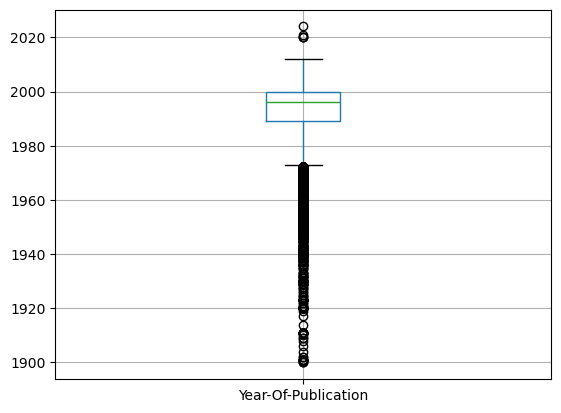

In [126]:
books_df.boxplot()

In [127]:
# No need to fix either

# Ratings Dataframe Preprocessing

In [129]:
# Now let's deal with the last df, ratings_df

In [130]:
ratings_df.duplicated().sum()

0

In [131]:
# no duplicates

In [132]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [133]:
ratings_df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [134]:
# looking at the difference between max and UQ, Book-Rating likely to have outliers

In [135]:
# Lets check for each column

In [136]:
# Now let' deal with User-ID column first

In [137]:
ratings_df['User-ID'].value_counts()

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [138]:
list(ratings_df['User-ID'].unique())

[276725,
 276726,
 276727,
 276729,
 276733,
 276736,
 276737,
 276744,
 276745,
 276746,
 276747,
 276748,
 276751,
 276754,
 276755,
 276760,
 276762,
 276765,
 276768,
 276772,
 276774,
 276780,
 276786,
 276788,
 276796,
 276798,
 276800,
 276803,
 276804,
 276806,
 276808,
 276811,
 276812,
 276813,
 276814,
 276817,
 276820,
 276822,
 276827,
 276828,
 276830,
 276832,
 276833,
 276835,
 276837,
 276838,
 276840,
 276842,
 276847,
 276848,
 276850,
 276852,
 276853,
 276854,
 276856,
 276857,
 276859,
 276861,
 276862,
 276863,
 276866,
 276869,
 276870,
 276872,
 276873,
 276875,
 276878,
 276879,
 276884,
 276887,
 276888,
 276889,
 276890,
 276896,
 276904,
 276905,
 276911,
 276912,
 276915,
 276916,
 276925,
 276927,
 276928,
 276929,
 276934,
 276936,
 276939,
 276943,
 276946,
 276949,
 276950,
 276953,
 276954,
 276957,
 276959,
 276963,
 276964,
 276965,
 276975,
 276981,
 276984,
 276986,
 276988,
 276989,
 276990,
 276992,
 276994,
 276997,
 276998,
 277002,
 277007,
 

In [139]:
ratings_df['User-ID'].nunique()

105283

In [140]:
# As it is ratings table, so we do expect similar users rating different books

In [141]:
# So this is ok

In [142]:
ratings_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [143]:
# Now let's deal with ISBN column

In [144]:
ratings_df.ISBN.value_counts()

ISBN
0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: count, Length: 340556, dtype: int64

In [145]:
list(ratings_df.ISBN.unique())

['034545104X',
 '0155061224',
 '0446520802',
 '052165615X',
 '0521795028',
 '2080674722',
 '3257224281',
 '0600570967',
 '038550120X',
 '342310538',
 '0425115801',
 '0449006522',
 '0553561618',
 '055356451X',
 '0786013990',
 '0786014512',
 '0060517794',
 '0451192001',
 '0609801279',
 '0671537458',
 '0679776818',
 '0943066433',
 '1570231028',
 '1885408226',
 '0747558167',
 '3442437407',
 '033390804X',
 '3596218098',
 '0684867621',
 '0451166892',
 '8440682697',
 '034544003X',
 '0380000059',
 '0380711524',
 '0451167317',
 '0451454952',
 '0843920262',
 '3404122879',
 '3404182928',
 '3404611306',
 '342662429',
 '3426690179',
 '3442424216',
 '3442425573',
 '3453092007',
 '3453157745',
 '3453176944',
 '3453185137',
 '3453185323',
 '3453213025',
 '3453877241',
 '3492226604',
 '3517017442',
 '3596125006',
 'B0000BLD7X',
 'N3453124715',
 '9029716894',
 '9057868059',
 '0140279091',
 '0553572369',
 '0571058086',
 '3499230933',
 '3596151465',
 '0099543818',
 '3404147723',
 '3423111321',
 '344213664

In [146]:
# There are couple of visible corrupted ISBNs here
# '2.02.032126.2', '2.264.03602.8',

In [147]:
# So to remove such noisy ISBNs, we will simply use books_df and will check if current ISBN is in books_df.ISBN

In [148]:
ratings_df[~ratings_df.ISBN.isin(books_df.ISBN)]

,User-ID,ISBN,Book-Rating
6,276736,3257224281,8
7,276737,0600570967,6
9,276745,342310538,10
25,276748,3442437407,0
26,276751,033390804X,0
...,...,...,...
1149444,276675,0747252327,0
1149446,276679,8804413530,8
1149581,276680,0679781587,9
1149758,276697,8445072897,0


In [149]:
118644  # but it do includes duplicate ISBNs in ratings_df

118644

In [150]:
118644/len(ratings_df)  # 10.30%

0.1031884360486354

In [151]:
invalid_ISBN = ratings_df.loc[~ratings_df['ISBN'].isin(books_df['ISBN']), 'ISBN'].unique()   # to calculate how uniques are corrupted 

In [152]:
invalid_ISBN

array(['3257224281', '0600570967', '342310538', ..., '0670849871',
       '15655122046', '05162443314'], dtype=object)

In [153]:
len(invalid_ISBN)

70405

In [154]:
# Hence total 70405 unique ISBNs out of all unique ISBNs in ratings_df are corrupted

70405/ratings_df.ISBN.nunique()  # 20%

0.2067354561364357

In [155]:
ratings_df.ISBN.nunique()

340556

In [156]:
# Even though they are 20%, we still have to remove them

# For that we have to consider only those ISBNs which are in books_df, like discussed earlier

In [157]:
ratings_df = ratings_df[ratings_df['ISBN'].isin(books_df['ISBN'])]

In [158]:
# Now lets check how much we are left with

In [159]:
ratings_df.shape  # earlier was 1149750

(1031136, 3)

In [160]:
ratings_df.ISBN.nunique()   # earlier was 340556

270151

In [161]:
ratings_df[~ratings_df.ISBN.isin(books_df.ISBN)]   # no any corrupted ISBN now

,User-ID,ISBN,Book-Rating


In [162]:
# Lets check once if we have any corrupted user_id too

In [163]:
ratings_df[~ratings_df['User-ID'].isin(user_df['User-ID'])]

,User-ID,ISBN,Book-Rating


In [164]:
# PHEWWWWWWW!!!!

In [165]:
# Now

ratings_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [166]:
# Now let's deal with Book-Rating column

In [167]:
ratings_df['Book-Rating'].value_counts()

Book-Rating
0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: count, dtype: int64

In [168]:
ratings_df.info()   # just checking if the column Book-Rating is of numeric data type

<class 'pandas.core.frame.DataFrame'>
Index: 1031136 entries, 0 to 1149778
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1031136 non-null  int64 
 1   ISBN         1031136 non-null  object
 2   Book-Rating  1031136 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 31.5+ MB


In [169]:
list(ratings_df['Book-Rating'].unique())

[0, 5, 3, 6, 7, 9, 8, 10, 1, 4, 2]

In [170]:
ratings_df['Book-Rating'].nunique()   # obviuosly will be 11

11

In [171]:
# Now the issue is should we need to remove the records with implicit 0 ratings

# It is one of the ways, but we will loose 56% of the data, 500k records still would be there

# There are few advanced things that can be cone with keeping implicit ratings as well, rn no any idea how to do it

In [172]:
# Now we have to check for nulls once again

In [173]:
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [174]:
# let's check for outliers too

<Axes: >

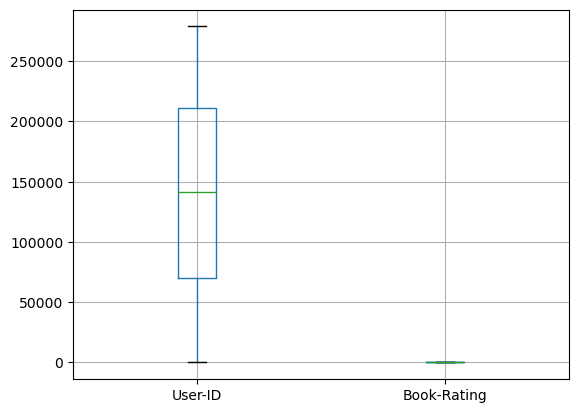

In [175]:
ratings_df.boxplot()

<Axes: ylabel='Book-Rating'>

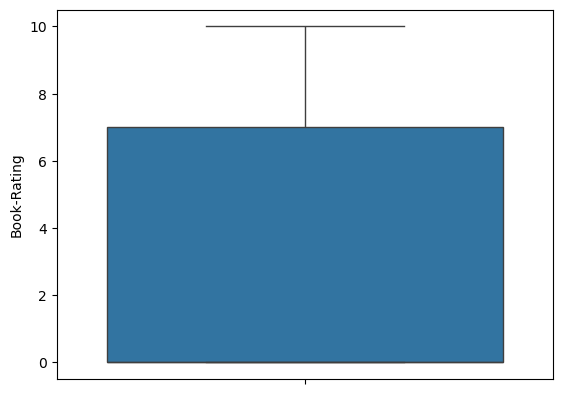

In [176]:
sns.boxplot(ratings_df['Book-Rating'])

In [177]:
# No outliers too

In [178]:
# Hence we are done till here

In [179]:
# Now lets have some plots to better visualise the data

# EDA Before Joining Sheets

### Users Table

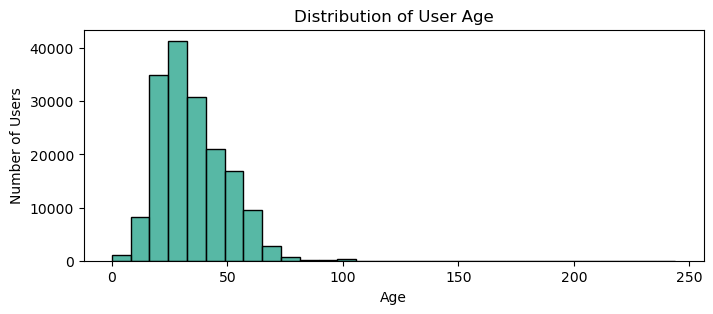

In [182]:
# Age distribution

plt.figure(figsize=(8,3))

sns.histplot(x = user_df.Age,bins=30,color=sns.color_palette('viridis')[3])
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.title("Distribution of User Age")
plt.show()


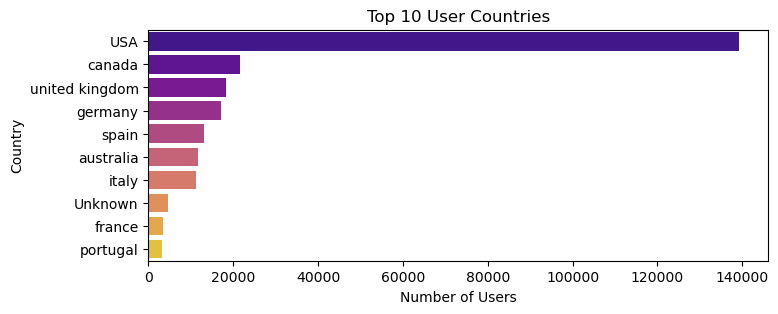

In [183]:
# Top 10 Countries

plt.figure(figsize=(8,3))
top_locations = user_df.Country.value_counts().head(10)
sns.barplot(x = top_locations.values, y = top_locations.index, palette="plasma")
plt.xlabel("Number of Users")
plt.ylabel("Country")
plt.title("Top 10 User Countries")
plt.show()

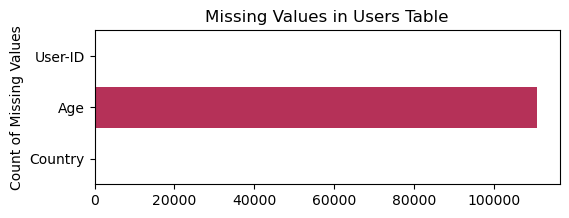

User-ID         0
Age        110762
Country         0
dtype: int64


In [184]:
# Missing value

plt.figure(figsize=(6,2))
missing_values_users = user_df.isna().sum()
sns.barplot(y=missing_values_users.index, x=missing_values_users.values, palette="rocket")
plt.title("Missing Values in Users Table")
plt.ylabel("Count of Missing Values")
plt.show()

print(missing_values_users)

## Books Table

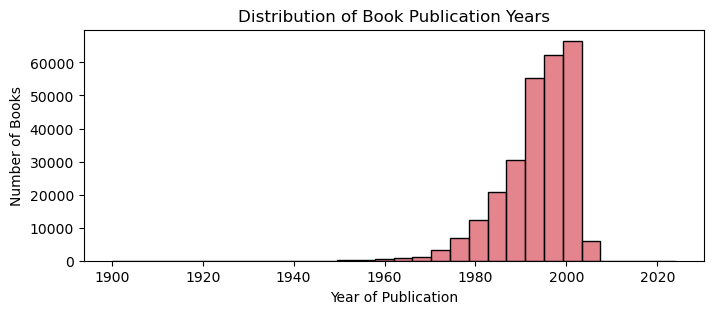

In [186]:
# Year of publication distribution - by decade

plt.figure(figsize=(8,3))

sns.histplot(x = books_df['Year-Of-Publication'],bins=30,color=sns.color_palette('plasma')[3])
plt.xlabel("Year of Publication")
plt.ylabel("Number of Books")
plt.title("Distribution of Book Publication Years")
plt.show()

In [187]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

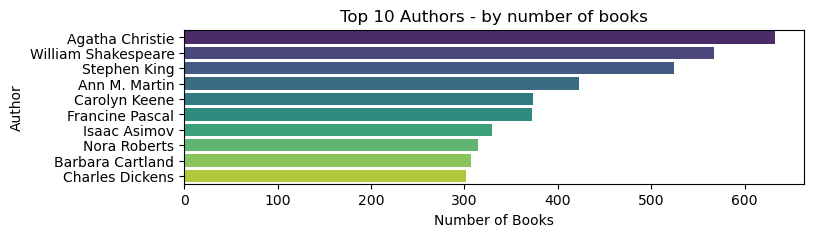

In [188]:
# Top 10 authors

plt.figure(figsize=(8,2))
top_authors = books_df['Book-Author'].value_counts().head(10)
sns.barplot(x = top_authors.values, y = top_authors.index, palette="viridis")
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.title("Top 10 Authors - by number of books")
plt.show()

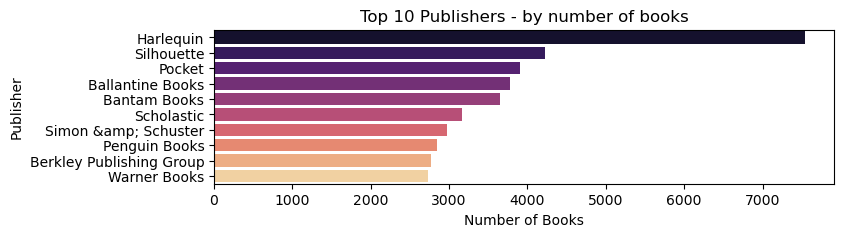

In [189]:
# Top 10 publishers

plt.figure(figsize=(8,2))
top_publishers = books_df.Publisher.value_counts().head(10)
sns.barplot(x = top_publishers.values, y = top_publishers.index, palette="magma")
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.title("Top 10 Publishers - by number of books")
plt.show()

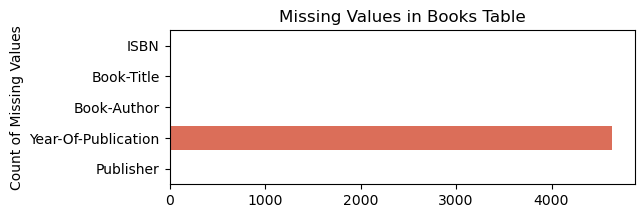

ISBN                      0
Book-Title                0
Book-Author               0
Year-Of-Publication    4637
Publisher                 0
dtype: int64


In [190]:
# Missing values check

plt.figure(figsize=(6,2))
missing_values_books = books_df.isna().sum()
sns.barplot(y=missing_values_books.index, x=missing_values_books.values, palette="rocket")
plt.title("Missing Values in Books Table")
plt.ylabel("Count of Missing Values")
plt.show()

print(missing_values_books)

### Ratings Table

In [192]:
ratings_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

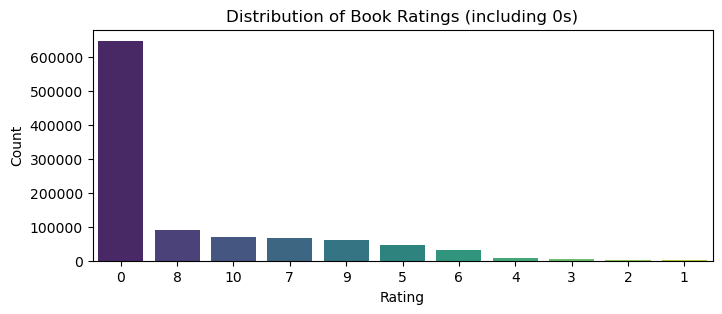

In [193]:
# Ratings distribution 

plt.figure(figsize=(8,3))
sns.countplot(data=ratings_df, x='Book-Rating', palette="viridis", order=ratings_df['Book-Rating'].value_counts().index)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Book Ratings (including 0s)")
plt.show()

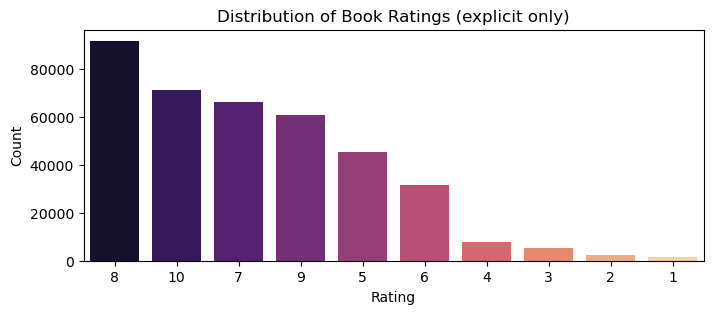

In [194]:
# Ratings distribution excluding 0

plt.figure(figsize=(8,3))
sns.countplot(data=ratings_df[ratings_df['Book-Rating'] > 0], x='Book-Rating', palette="magma", 
              order=ratings_df[ratings_df['Book-Rating'] > 0]['Book-Rating'].value_counts().index)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Book Ratings (explicit only)")
plt.show()

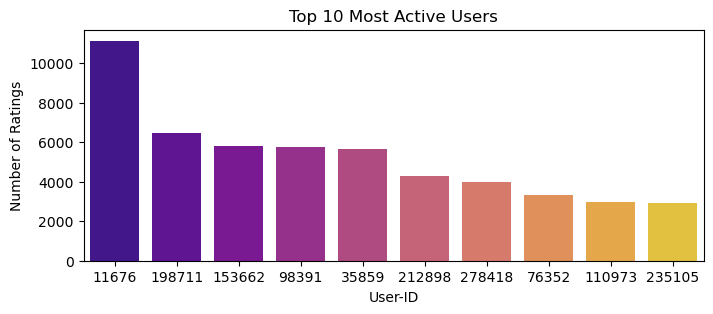

In [195]:
# Most active users - top 10

plt.figure(figsize=(8,3))

top_users = ratings_df['User-ID'].value_counts().head(10)
sns.barplot(y=top_users.values, x=top_users.index, palette="plasma",order=top_users.index)
plt.xlabel("User-ID")
plt.ylabel("Number of Ratings")
plt.title("Top 10 Most Active Users")
plt.show()


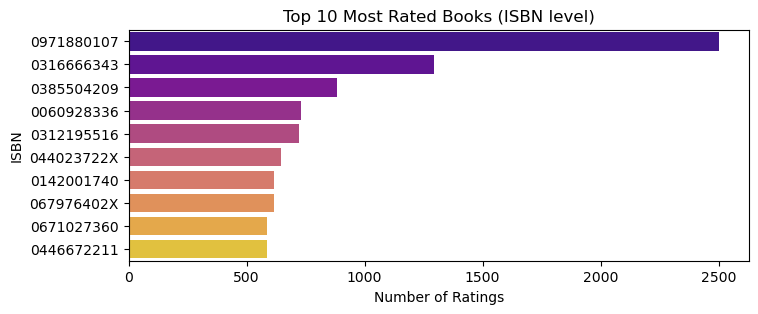

In [196]:
# Most rated books - top 10

plt.figure(figsize=(8,3))

top_rated_books = ratings_df.ISBN.value_counts().head(10)
sns.barplot(x=top_rated_books.values, y=top_rated_books.index, palette="plasma",order=top_rated_books.index)
plt.xlabel("Number of Ratings")
plt.ylabel("ISBN")
plt.title("Top 10 Most Rated Books (ISBN level)")
plt.show()

# Joinining the sheets

In [198]:
# Lets first join Ratings with Users
ratings_users = ratings_df.merge(user_df, on="User-ID", how="inner")

# Now lets join with Books
final_df = ratings_users.merge(books_df, on="ISBN", how="inner")

In [199]:
# Why Inner Join? Why not full/left/right?

# As I cleaned not existing ISBNS from ratings df, any of the joins(inner, left) will not make any difference

# But inner join is a best practice because it guarantees future data integrity

In [200]:
# Lets check shape before and after merge

print("Ratings before merge:", ratings_df.shape)
print("After merge (master_df):", final_df.shape)

Ratings before merge: (1031136, 3)
After merge (master_df): (1031136, 9)


In [201]:
ratings_df.shape

(1031136, 3)

In [202]:
user_df.shape

(278858, 3)

In [203]:
books_df.shape

(271360, 5)

In [204]:
# Now lets check missing values in merged dataset

final_df.isna().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Age                    277835
Country                     0
Book-Title                  0
Book-Author                 0
Year-Of-Publication     14070
Publisher                   0
dtype: int64

In [205]:
user_df.isna().sum()

User-ID         0
Age        110762
Country         0
dtype: int64

In [206]:
books_df.isna().sum()

ISBN                      0
Book-Title                0
Book-Author               0
Year-Of-Publication    4637
Publisher                 0
dtype: int64

In [207]:
# We dont really want those 2 columns (Year and Age), but lets just keep it untill model building

In [208]:
final_df.head()

,User-ID,ISBN,Book-Rating,Age,Country,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,NaN,USA,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,NaN,USA,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,16.0,australia,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,16.0,croatia,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,16.0,croatia,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press


# EDA After Joining Sheets

### User-Book Interactions

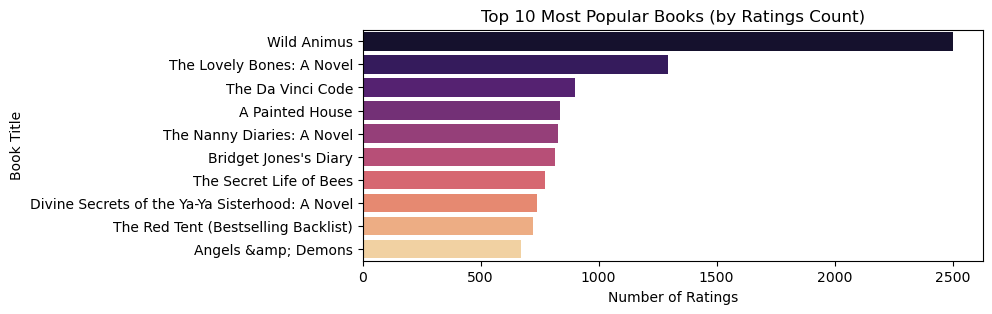

In [211]:
# Most popular books by number of ratings

plt.figure(figsize=(8,3))

top_books = final_df['Book-Title'].value_counts().head(10)
sns.barplot(x=top_books.values, y = top_books.index, palette='magma')
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
plt.title("Top 10 Most Popular Books (by Ratings Count)")
plt.show()

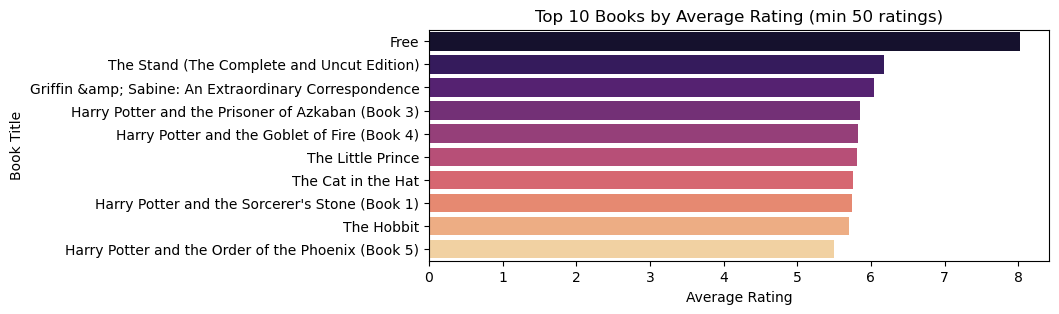

In [212]:
# Books with highest avg rating - top 10

plt.figure(figsize=(8,3))

avg_ratings = final_df.groupby('Book-Title')['Book-Rating'].agg(['mean','count'])
avg_ratings = avg_ratings[avg_ratings['count'] >= 50]  # filter to avoid one-off ratings
top_avg_books = avg_ratings.sort_values('mean', ascending=False).head(10)

sns.barplot(x=top_avg_books['mean'], y=top_avg_books.index, palette="magma")
plt.xlabel("Average Rating")
plt.ylabel("Book Title")
plt.title("Top 10 Books by Average Rating (min 50 ratings)")
plt.show()


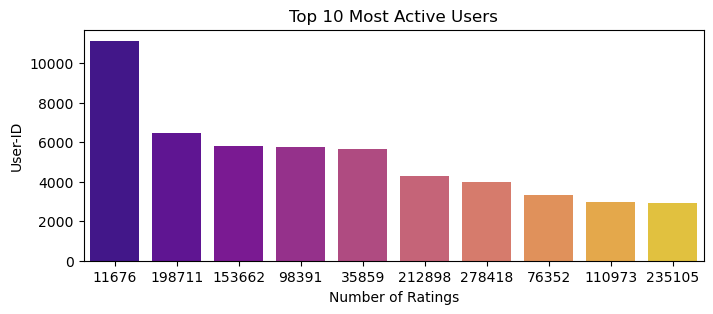

In [213]:
# Most active users

plt.figure(figsize=(8,3))

top_users = final_df['User-ID'].value_counts().head(10)
sns.barplot(y=top_users.values, x=top_users.index, palette="plasma",order=top_users.index)
plt.xlabel("Number of Ratings")
plt.ylabel("User-ID")
plt.title("Top 10 Most Active Users")
plt.show()

### Cross Analysis

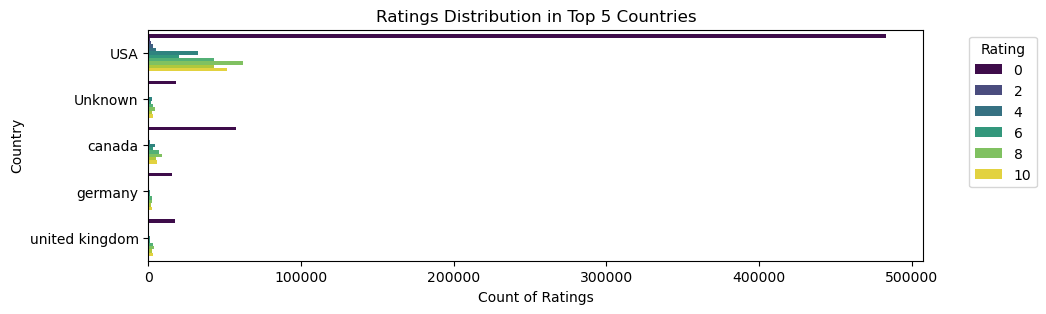

In [215]:
# Ratings distribution by top countries

plt.figure(figsize=(10,3))

top_locs = final_df['Country'].value_counts().head(5).index
loc_data = final_df[final_df['Country'].isin(top_locs)]

sns.countplot(data=loc_data, y='Country', hue='Book-Rating', palette="viridis")
plt.xlabel("Count of Ratings")
plt.ylabel("Country")
plt.title("Ratings Distribution in Top 5 Countries")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


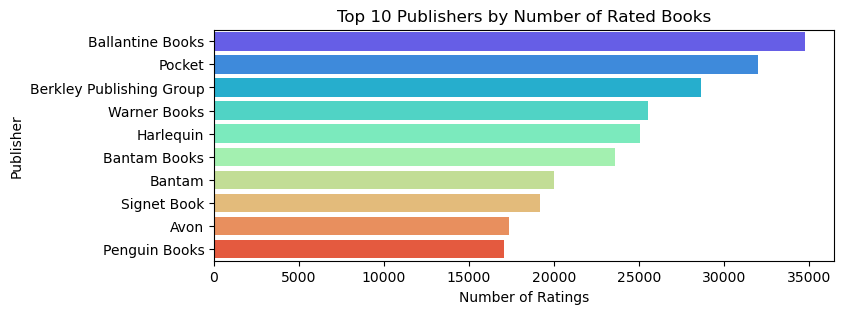

In [216]:
# Top publishers by number of rated books

plt.figure(figsize=(8,3))

top_publishers = final_df.Publisher.value_counts().head(10)

sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="rainbow")
plt.xlabel("Number of Ratings")
plt.ylabel("Publisher")
plt.title("Top 10 Publishers by Number of Rated Books")
plt.show()


In [217]:
final_df

,User-ID,ISBN,Book-Rating,Age,Country,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,NaN,USA,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,NaN,USA,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,16.0,australia,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,16.0,croatia,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,16.0,croatia,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,NaN,USA,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig
1031132,276704,1563526298,9,NaN,USA,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1031133,276706,0679447156,0,18.0,canada,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1031134,276709,0515107662,10,38.0,USA,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books


# Deleting Unnecessary Columns

In [219]:
# So before moving futher, lets just drop unncessary columns first

In [220]:
final_df['Book-Author'].nunique(), final_df['Publisher'].nunique()

(101587, 16729)

In [221]:
final_df.shape

(1031136, 9)

In [222]:
final_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Age', 'Country', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher'],
      dtype='object')

In [223]:
final_df.drop(columns=['Book-Title','Age', 'Year-Of-Publication','Publisher'],inplace=True)

In [224]:
final_df

,User-ID,ISBN,Book-Rating,Country,Book-Author
0,276725,034545104X,0,USA,M. J. Rose
1,276726,0155061224,5,USA,Judith Rae
2,276727,0446520802,0,australia,Nicholas Sparks
3,276729,052165615X,3,croatia,Philip Prowse
4,276729,0521795028,6,croatia,Sue Leather
...,...,...,...,...,...
1031131,276704,0876044011,0,USA,Kevin J. Todeschi
1031132,276704,1563526298,9,USA,Clark Howard
1031133,276706,0679447156,0,canada,Andrew Weil
1031134,276709,0515107662,10,USA,Catherine Coulter


# Collaborative Filtering - Memory Based - User-User

In [226]:
# For CF we dont need any scaling or encoding

In [227]:
# For CF we will consider explicit ratings only

In [228]:
explicit_df = final_df[final_df['Book-Rating'] > 0]
explicit_df.head()

,User-ID,ISBN,Book-Rating,Country,Book-Author
1,276726,0155061224,5,USA,Judith Rae
3,276729,052165615X,3,croatia,Philip Prowse
4,276729,0521795028,6,croatia,Sue Leather
6,276744,038550120X,7,USA,JOHN GRISHAM
13,276747,0060517794,9,USA,Rebecca Wells


In [229]:
# First let's create our pivot table

In [230]:
# user_item_matrix = explicit_df.pivot_table(index='User-ID', columns='ISBN',values='Book-Rating')
# user_item_matrix

# This gives error due to gigantix matrix formation

In [231]:
# For that we will filter active users and active books with the criterion of atleast 50 ratings

# This reduces the matrix size signifcantly

In [232]:
user_counts = explicit_df['User-ID'].value_counts()
active_users = user_counts[user_counts >= 50].index  # keep users with >= 50 ratings
user_item_df = explicit_df[explicit_df['User-ID'].isin(active_users)]

book_counts = explicit_df['ISBN'].value_counts()
popular_books = book_counts[book_counts >= 50].index  # keep books with >= 50 ratings
user_item_df = user_item_df[user_item_df['ISBN'].isin(popular_books)]

In [233]:
user_item_matrix = user_item_df.pivot_table(index='User-ID', columns='ISBN',values='Book-Rating').fillna(0)
user_item_matrix

ISBN,002542730X,0060096195,006016848X,0060173289,0060175400,0060199652,0060391626,0060392452,0060502258,0060915544,...,1558745157,1559029838,1573225517,1573225789,1573227331,1573229326,1573229571,1592400876,1844262553,1878424319
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [234]:
# Now we have to calculate the similarity matrix

In [235]:
from sklearn.metrics import pairwise_distances

In [236]:
user_similarity = 1 - pairwise_distances(user_item_matrix, metric="cosine")
user_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.15396007, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.15396007, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [237]:
np.fill_diagonal(user_similarity, 0)

In [238]:
# let's convert to dataframe

In [239]:
user_similarity_df = pd.DataFrame(user_similarity,index=user_item_matrix.index,columns=user_item_matrix.index)
user_similarity_df

User-ID,254,638,1424,1733,1903,2033,2110,2276,2766,2891,...,274004,274061,274111,274301,275970,276680,277427,278137,278188,278418
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.000000,0.00000,0.0,0.0,0.493493,0.00000,0.000000,0.000000,0.092823,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0
638,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.00000,0.053859,0.092459,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.152783,0.143986,0.00000,0.0,0.0
1424,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.00000,0.000000,0.116692,0.094103,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.15396,0.0,0.0
1733,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.56194,0.000000,0.016218,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0
1903,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276680,0.0,0.152783,0.00000,0.0,0.0,0.000000,0.00000,0.000000,0.167442,0.000000,...,0.159443,0.0,0.0,0.000000,0.0,0.000000,0.073916,0.00000,0.0,0.0
277427,0.0,0.143986,0.00000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.074143,0.0,0.0,0.064286,0.0,0.073916,0.000000,0.00000,0.0,0.0
278137,0.0,0.000000,0.15396,0.0,0.0,0.104009,0.00000,0.000000,0.000000,0.160979,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0


In [240]:
# Let's define a function for recommendation

In [241]:
from operator import itemgetter

def recommend_books(user_id, n_recommendations=10):
    if user_id not in user_item_matrix.index:
        print("User not found!")
        return []
    
    # Get similarity scores for the target user
    sim_scores = user_similarity_df[user_id].drop(user_id)
    top_sim_users = sim_scores.sort_values(ascending=False)[:15]
    
    # Books the target user already rated
    user_books = set(user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index)
    
    recommendations = {}
    sim_sums = {}
    
    for sim_user, sim_strength in top_sim_users.items():
        sim_user_books = user_item_matrix.loc[sim_user][user_item_matrix.loc[sim_user] > 0]
        for book, rating in sim_user_books.items():
            if book not in user_books:
                # weighted score
                recommendations[book] = recommendations.get(book, 0) + sim_strength * rating
                sim_sums[book] = sim_sums.get(book, 0) + sim_strength
    
    # Normalize by similarity sums to keep scale ~1–10
    for book in recommendations:
        recommendations[book] /= sim_sums[book]
    
    # sort and return top-N
    recommended_books = sorted(recommendations.items(), key=itemgetter(1), reverse=True)[:n_recommendations]
    return [book for book, score in recommended_books]


In [242]:
# Example
print(recommend_books(1903, n_recommendations=5))

['0439136350', '0553277472', '0316096199', '0156528207', '0316776963']


In [243]:
# What if we need book titles at this stage? We can use books_df

recommended_books = recommend_books(1903, n_recommendations=5)
books_df[books_df.ISBN.isin(recommended_books)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
388,0156528207,The Little Prince,Antoine de Saint-ExupÃ©ry,1968.0,Harcourt
833,0316776963,Me Talk Pretty One Day,David Sedaris,2001.0,Back Bay Books
3839,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999.0,Scholastic
3939,0316096199,Lucky : A Memoir,Alice Sebold,2002.0,Back Bay Books
4297,0553277472,Zen and the Art of Motorcycle Maintenance: An ...,ROBERT PIRSIG,1984.0,Bantam


In [244]:
# These are noe actually sorted as per the recommendation results, but we just have to give top N (not in any order) so its fine

### Validating CF - user-user

In [246]:
from sklearn.model_selection import train_test_split

train_matrix = user_item_matrix.copy()
test_dict = {}

for user in user_item_matrix.index:
    rated_books = user_item_matrix.loc[user][user_item_matrix.loc[user] > 0].index.tolist()
    if len(rated_books) >= 5:
        train_books, test_books = train_test_split(rated_books, test_size=0.2, random_state=42)
        test_dict[user] = test_books
        # Mask test books in training matrix
        train_matrix.loc[user, test_books] = 0
    else:
        test_dict[user] = []

In [247]:
train_similarity = 1 - pairwise_distances(train_matrix, metric="cosine")
np.fill_diagonal(train_similarity, 0)
train_similarity_df = pd.DataFrame(train_similarity,index=train_matrix.index,columns=train_matrix.index)

In [248]:
# This is the same function, but only for evaluation process

def recommend_books_eval(user_id, n_recommendations=10):
    if user_id not in train_matrix.index:
        print("User not found!")
        return []
    
    # Get similarity scores for the target user
    sim_scores = train_similarity_df[user_id].drop(user_id)
    top_sim_users = sim_scores.sort_values(ascending=False)[:15]
    
    # Books the target user already rated
    user_books = set(train_matrix.loc[user_id][train_matrix.loc[user_id] > 0].index)
    
    recommendations = {}
    sim_sums = {}
    
    for sim_user, sim_strength in top_sim_users.items():
        sim_user_books = train_matrix.loc[sim_user][train_matrix.loc[sim_user] > 0]
        for book, rating in sim_user_books.items():
            if book not in user_books:
                # weighted score
                recommendations[book] = recommendations.get(book, 0) + sim_strength * rating
                sim_sums[book] = sim_sums.get(book, 0) + sim_strength
    
    # Normalize by similarity sums to keep scale ~1–10
    for book in recommendations:
        if sim_sums[book] != 0:
            recommendations[book] /= sim_sums[book]
    
    # sort and return top-N
    recommended_books = sorted(recommendations.items(), key=itemgetter(1), reverse=True)[:n_recommendations]
    return [book for book, score in recommended_books]

In [249]:
# Testing part

hits = 0
total_recommended = 0
total_relevant = 0
N = 50  # Top-N

for user, test_books in test_dict.items():
    recommended = recommend_books_eval(user, n_recommendations=N)
    hits += len(set(recommended) & set(test_books))
    total_recommended += N
    total_relevant += len(test_books)

precision = hits / total_recommended
recall = hits / total_relevant

print(f"Precision@{N}: {precision:.4f}")
print(f"Recall@{N}: {recall:.4f}")

Precision@50: 0.0111
Recall@50: 0.2077


| Neighbors | N=50   | Recall\@50             |
| --------- | ------ | ---------------------- |
| 10        | 0.2077 | moderate               |
| 15        | 0.2077 | slightly better        |
| 20        | N/A    | slightly better recall |


# Collaborative Filtering - Memory Based - item-item

In [252]:
item_similarity = 1 - pairwise_distances(user_item_matrix.T, metric="cosine")
np.fill_diagonal(item_similarity, 0)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)
item_similarity_df.head()

ISBN,002542730X,0060096195,006016848X,0060173289,0060175400,0060199652,0060391626,0060392452,0060502258,0060915544,...,1558745157,1559029838,1573225517,1573225789,1573227331,1573229326,1573229571,1592400876,1844262553,1878424319
ISBN,,,,,,,,,,,,,,,,,,,,,
002542730X,0.000000,0.000000,0.042177,0.000000,0.113369,0.046501,0.041835,0.065570,0.049630,0.094415,...,0.079835,0.041006,0.091444,0.063208,0.153940,0.128837,0.083961,0.031727,0.154508,0.00000
0060096195,0.000000,0.000000,0.000000,0.000000,0.077222,0.000000,0.000000,0.048523,0.000000,0.045887,...,0.000000,0.136553,0.000000,0.000000,0.000000,0.000000,0.000000,0.041088,0.000000,0.00000
006016848X,0.042177,0.000000,0.000000,0.000000,0.091043,0.082157,0.073913,0.072082,0.081380,0.000000,...,0.072956,0.072447,0.000000,0.062040,0.052303,0.050852,0.135094,0.056054,0.272978,0.10893
0060173289,0.000000,0.000000,0.000000,0.000000,0.106727,0.193689,0.000000,0.097912,0.115554,0.000000,...,0.076022,0.000000,0.000000,0.056566,0.000000,0.033118,0.082806,0.000000,0.000000,0.00000
0060175400,0.113369,0.077222,0.091043,0.106727,0.000000,0.407532,0.090305,0.176136,0.050414,0.127570,...,0.089137,0.177029,0.000000,0.075800,0.063902,0.062130,0.081556,0.068486,0.333519,0.00000


In [253]:
# Defining the function

In [254]:
def recommend_books_item(user_id, n_recommendations=10):
    if user_id not in user_item_matrix.index:
        print("User not found!")
        return []

    # Books the target user already rated
    user_books = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0]

    recommendations = {}
    sim_sums = {}

    # for each book rated by the user
    for book, rating in user_books.items():
        # get similar books
        sim_books = item_similarity_df[book].sort_values(ascending=False)[:5]  # top 5 similar books
        for sim_book, sim_strength in sim_books.items():
            if sim_book not in user_books.index:
                # Weighted score
                recommendations[sim_book] = recommendations.get(sim_book, 0) + sim_strength * rating
                sim_sums[sim_book] = sim_sums.get(sim_book, 0) + sim_strength

    # Normalize by similarity sums safely
    for book in recommendations:
        if sim_sums[book] != 0:
            recommendations[book] /= sim_sums[book]

    # Sort and return top-N
    recommended_books = sorted(recommendations.items(), key=itemgetter(1), reverse=True)[:n_recommendations]
    return [book for book, score in recommended_books]

In [255]:
# Example usage
print(recommend_books_item(27647, n_recommendations=5))

['0345413350', '0446359866', '1559029838', '0451160525', '034538475X']


In [256]:
# We can get Book Titles using books_df like earlier

### Validating CF - item-item

In [258]:
train_matrix = user_item_matrix.copy()
test_dict = {}
from sklearn.model_selection import train_test_split

for user in user_item_matrix.index:
    rated_books = user_item_matrix.loc[user][user_item_matrix.loc[user] > 0].index.tolist()
    if len(rated_books) >= 5:
        train_books, test_books = train_test_split(rated_books, test_size=0.2, random_state=42)
        test_dict[user] = test_books
        # Mask test books in training matrix
        train_matrix.loc[user, test_books] = 0
    else:
        test_dict[user] = []


In [259]:
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd

item_similarity = 1 - pairwise_distances(train_matrix.T, metric="cosine")
np.fill_diagonal(item_similarity, 0)
item_similarity_df = pd.DataFrame(item_similarity, index=train_matrix.columns, columns=train_matrix.columns)

In [260]:
from operator import itemgetter

def recommend_books_item_eval(user_id, n_recommendations=10, top_k_similar=10):
    if user_id not in train_matrix.index:
        return []

    user_books = train_matrix.loc[user_id][train_matrix.loc[user_id] > 0]
    recommendations = {}
    sim_sums = {}

    for book, rating in user_books.items():
        # Pick top-K similar books
        sim_books = item_similarity_df[book].sort_values(ascending=False)[:top_k_similar]
        for sim_book, sim_strength in sim_books.items():
            if sim_book not in user_books.index:
                recommendations[sim_book] = recommendations.get(sim_book, 0) + sim_strength * rating
                sim_sums[sim_book] = sim_sums.get(sim_book, 0) + sim_strength

    for book in recommendations:
        if sim_sums[book] != 0:
            recommendations[book] /= sim_sums[book]

    recommended_books = sorted(recommendations.items(), key=itemgetter(1), reverse=True)[:n_recommendations]
    return [book for book, score in recommended_books]


In [261]:
hits = 0
total_recommended = 0
total_relevant = 0
N = 50  # Top-N recommendations

for user, test_books in test_dict.items():
    recommended = recommend_books_item_eval(user, n_recommendations=N, top_k_similar=5)
    hits += len(set(recommended) & set(test_books))
    total_recommended += N
    total_relevant += len(test_books)

precision = hits / total_recommended
recall = hits / total_relevant

print(f"Precision@{N}: {precision:.4f}")
print(f"Recall@{N}: {recall:.4f}")


Precision@50: 0.0119
Recall@50: 0.2232


In [262]:
# in this case 5 neighbors are better

In [263]:
# Lets also see the little diff between above 2 strategies

| Aspect                | User-Based CF                            | Item-Based CF                                           |
| --------------------- | ---------------------------------------- | ------------------------------------------------------- |
| Similarity matrix     | Users × Users                            | Items × Items                                           |
| Recommendation logic  | Weighted sum of **other users’ ratings** | Weighted sum of **user’s own ratings on similar items** |
| Input to weighted sum | Similar users’ ratings                   | Similar items’ ratings by the target user               |
| Evaluation            | Same: Precision\@N / Recall\@N           | Same: Precision\@N / Recall\@N                          |


In [265]:
# Just a reminder for pure CF, demographic data is not considered

# Collaborative Filtering - Model Based

In [267]:
# we have user_item_df already, which is explicit_df

# In CF we are working with explicit data only

In [268]:
user_item_df.head()

,User-ID,ISBN,Book-Rating,Country,Book-Author
1150,277427,002542730X,10,USA,James Finn Garner
1168,277427,0061009059,9,USA,Janet Evanovich
1215,277427,0316776963,8,USA,David Sedaris
1235,277427,0345413903,10,USA,Jonathan Kellerman
1270,277427,0385424736,9,USA,John Grisham


In [269]:
# Let's import required packages for SVD

In [270]:
!pip install scikit-surprise


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [271]:
from surprise import Dataset, Reader, SVD 
from surprise.model_selection import train_test_split as train_test_split_surprise
from surprise import accuracy
from surprise.model_selection import GridSearchCV as GridSearchCV_surprise 

In [272]:
# suprise requires a Reader object

reader = Reader(rating_scale=(1, 10))

In [273]:
# now we have to load the data

data = Dataset.load_from_df(user_item_df[['User-ID', 'ISBN', 'Book-Rating']], reader)

In [274]:
# Let's split the data

train_set, test_set = train_test_split_surprise(data, test_size=0.2, random_state=42)

In [275]:
train_set

In [276]:
# Lets train the SVD model

svd_model = SVD(n_factors=50, n_epochs=20, lr_all=0.005, reg_all=0.02)
svd_model.fit(train_set)

In [277]:
predictions = svd_model.test(test_set)
rmse = accuracy.rmse(predictions)

RMSE: 1.5282


In [278]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for user_id, item_id, true_r, est, _ in predictions:
        top_n[user_id].append((item_id, est))
    # Sort and take top-N
    for user_id, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[user_id] = [item_id for (item_id, _) in user_ratings[:n]]
    return top_n

top_n_preds = get_top_n(predictions, n=10)
top_n_preds

defaultdict(list,
            {201684: ['0446359866', '0440225701'],
             7346: ['0312265867',
              '0385335881',
              '0380977788',
              '080410753X',
              '0804106304',
              '155874262X',
              '0440236673',
              '0670892963',
              '0345391055'],
             225379: ['0345339681', '0312924585'],
             274301: ['0684801523',
              '0553280368',
              '0449221512',
              '0449003787',
              '0425163407',
              '0553280341',
              '0684865742',
              '0671011367'],
             5582: ['0312966970', '0312976275', '1558744150', '014028009X'],
             28177: ['0671041789',
              '0060199652',
              '0446364193',
              '0375703055',
              '0452283205',
              '0375727345',
              '0375702709',
              '0446608815'],
             242083: ['0679723161',
              '043935806X',
              '

In [279]:
hits = 0
total_recommended = 0
total_relevant = 0

# Build test dict
test_dict = defaultdict(list)
for user_id, item_id, true_r in test_set:
    test_dict[user_id].append(item_id)

N = 30
for user_id, test_books in test_dict.items():
    recommended = top_n_preds.get(user_id, [])
    hits += len(set(recommended) & set(test_books))
    total_recommended += N
    total_relevant += len(test_books)

precision = hits / total_recommended
recall = hits / total_relevant

print(f"Precision@{N}: {precision:.4f}")
print(f"Recall@{N}: {recall:.4f}")


Precision@30: 0.1012
Recall@30: 0.9554


In [280]:
param_grid = {
    'n_factors': [20, 50, 100],
    'n_epochs': [20, 30, 40],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.05, 0.1]
}

In [281]:
grid = GridSearchCV_surprise(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)
grid.fit(data)

In [282]:
print("Best RMSE score:", grid.best_score['rmse'])
print("Best parameters:", grid.best_params['rmse'])

Best RMSE score: 1.5308033893988755
Best parameters: {'n_factors': 20, 'n_epochs': 40, 'lr_all': 0.005, 'reg_all': 0.1}


In [283]:
# Lets build model again

best_model = SVD(n_factors=20, n_epochs=30, lr_all=0.005, reg_all=0.1)
best_model.fit(train_set)

In [284]:
best_predictions = best_model.test(test_set)
rmse = accuracy.rmse(best_predictions)

RMSE: 1.5229


In [285]:
# Let's get top n preds again

top_n_preds_best = get_top_n(best_predictions, n=10)
top_n_preds_best

defaultdict(list,
            {201684: ['0440225701', '0446359866'],
             7346: ['0312265867',
              '0385335881',
              '0380977788',
              '0804106304',
              '155874262X',
              '080410753X',
              '0440236673',
              '0670892963',
              '0345391055'],
             225379: ['0345339681', '0312924585'],
             274301: ['0553280368',
              '0671011367',
              '0449003787',
              '0449221512',
              '0553280341',
              '0684801523',
              '0684865742',
              '0425163407'],
             5582: ['0312966970', '1558744150', '0312976275', '014028009X'],
             28177: ['0671041789',
              '0060199652',
              '0446364193',
              '0375703055',
              '0452283205',
              '0375727345',
              '0375702709',
              '0446608815'],
             242083: ['043935806X',
              '0679723161',
              '

In [286]:
hits = 0
total_recommended = 0
total_relevant = 0

# Build test dict
test_dict = defaultdict(list)
for user_id, item_id, true_r in test_set:
    test_dict[user_id].append(item_id)

N = 50
for user_id, test_books in test_dict.items():
    recommended = top_n_preds_best.get(user_id, [])
    hits += len(set(recommended) & set(test_books))
    total_recommended += N
    total_relevant += len(test_books)

precision = hits / total_recommended
recall = hits / total_relevant

print(f"Precision@{N}: {precision:.4f}")
print(f"Recall@{N}: {recall:.4f}")


Precision@50: 0.0607
Recall@50: 0.9554


In [287]:
# Results are almost same

In [288]:
best_model

In [289]:
# Now we have to train the model for entire data

In [290]:
best_model.fit(data.build_full_trainset())

In [291]:
# Now, time for final predictions

In [292]:
final_predictions = []

all_users = user_item_df['User-ID'].unique()
all_books = user_item_df['ISBN'].unique()

for user_id in all_users:
    user_rated_books = set(user_item_df[user_item_df['User-ID'] == user_id]['ISBN'])
    for item_id in all_books:
        if item_id not in user_rated_books:
            pred = best_model.predict(user_id, item_id)
            final_predictions.append(pred)

In [293]:
top_n_preds_final = get_top_n(final_predictions, n=10)
top_n_preds_final

defaultdict(list,
            {277427: ['0345339738',
              '0440998050',
              '0345348036',
              '0679723161',
              '0449005615',
              '0064400557',
              '0451191145',
              '1400032717',
              '0439139600',
              '0553274295'],
             278137: ['0345339738',
              '0553274295',
              '0451191145',
              '0064400557',
              '0345348036',
              '0345465083',
              '0449005615',
              '0679723161',
              '043936213X',
              '0440998050'],
             278188: ['0345339738',
              '0553274295',
              '0345348036',
              '0451191145',
              '0449005615',
              '0679723161',
              '1400032717',
              '043936213X',
              '0440998050',
              '0064400557'],
             278418: ['0345339738',
              '0812550706',
              '0451191145',
              '05532742

In [294]:
# Why defaultdict?

# If you try to access a key that doesn’t exist, it automatically creates a default value for it, instead of raising a KeyError

# d['user1'].append('book1'),,,,,,d['user2'].append('book2')
# Output: {'user1': ['book1'], 'user2': ['book2']}

# This is not possible directly in normal dicts, in that case we have to do d['user1']=[] first then we can append

In [295]:
# And what about defaultdict(list)? 

# It means “Whenever a key is accessed that doesn’t exist, automatically create an empty list as its value.”

In [296]:
def recommend_svd_for_user(user_id, final_predictions, n=10):
    return get_top_n(final_predictions, n).get(user_id, [])

# Example:
recommend_svd_for_user(1903, final_predictions,n=5)


['0345339738', '0449005615', '0440998050', '0553274295', '0679723161']

# Content-Based Filtering

In [298]:
final_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Country', 'Book-Author'], dtype='object')

In [299]:
# In our case Authors are not too much to use TFIDF vectoriser

# We can use countvectoriser as we do consider Authors are repitative

from sklearn.feature_extraction.text import CountVectorizer

In [300]:
books_df_CB = final_df[['ISBN','Book-Author']]
books_df_CB

,ISBN,Book-Author
0,034545104X,M. J. Rose
1,0155061224,Judith Rae
2,0446520802,Nicholas Sparks
3,052165615X,Philip Prowse
4,0521795028,Sue Leather
...,...,...
1031131,0876044011,Kevin J. Todeschi
1031132,1563526298,Clark Howard
1031133,0679447156,Andrew Weil
1031134,0515107662,Catherine Coulter


In [301]:
books_df_CB.duplicated().sum()

760985

In [302]:
# We have to remove those duplicates first

In [303]:
books_df_CB.drop_duplicates(inplace=True)

In [304]:
books_df_CB.duplicated().sum()

0

In [305]:
books_df_CB.shape

(270151, 2)

In [306]:
# Now let's vectorize

In [307]:
vectorizer = CountVectorizer()
feature_matrix = vectorizer.fit_transform(books_df_CB['Book-Author'])

In [308]:
feature_matrix

<270151x47536 sparse matrix of type '<class 'numpy.int64'>'
	with 561780 stored elements in Compressed Sparse Row format>

In [309]:
book_index_mapping = {book: idx for idx, book in enumerate(books_df_CB['ISBN'])}
index_book_mapping = {idx: book for book, idx in book_index_mapping.items()}

In [310]:
# we can skip train test split here as mode is based on only one feature in such a sparse data

# obviously results will not be good

# Each user may have rated very few books, so masking some for testing could leave almost nothing to generate meaningful recommendations.

In [311]:
# from sklearn.neighbors import NearestNeighbors

# neighbor_options = [5, 10, 15, 20]
# results = []

# for k in neighbor_options:
#     nn_model = NearestNeighbors(n_neighbors=k, metric='cosine', algorithm='brute')
#     nn_model.fit(feature_matrix)  
    
#     # Use average distance as proxy metric
#     distances, indices = nn_model.kneighbors(feature_matrix)
#     avg_distance = distances.mean()
    
#     results.append((k, avg_distance))
#     print(f"Neighbors: {k}, Avg cosine distance: {avg_distance:.4f}")

# # Choose the best neighbors
# best_neighbors = min(results, key=lambda x: x[1])[0]
# print(f"Best neighbors based on avg distance: {best_neighbors}")


# It resulted in 5

In [312]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, metric='cosine', algorithm='brute')
nn.fit(feature_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [313]:
def recommend_content_based(user_id, n=10):
    # Get books liked by the user
    user_books = user_item_matrix.loc[user_id]
    liked_books = user_books[user_books > 0].index.tolist()
    
    scores = {}
    
    for liked_book in liked_books:
        if liked_book not in book_index_mapping:
            continue  # skip if book not in CB dataframe
        
        liked_idx = book_index_mapping[liked_book]
        liked_vector = feature_matrix[liked_idx]
        
        # Find nearest neighbors
        distances, indices = nn.kneighbors(liked_vector, n_neighbors=5)
        for dist, idx in zip(distances[0], indices[0]):
            rec_book = index_book_mapping[idx]
            if rec_book not in liked_books:
                # similarity = 1 - distance
                scores[rec_book] = scores.get(rec_book, 0) + (1 - dist)

    # Return top-N recommendations
    recommended = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:n]
    return [b for b, s in recommended]

In [314]:
recommend_content_based(1903, n=10)

['0812508645',
 '0312850549',
 '0812502124',
 '0312853238',
 '0812509250',
 '2845880146',
 '0316779490',
 '0316779237',
 '3251004662',
 '2290319740']

# Content Based - With Country

In [316]:
# Lets add country to CB

In [317]:
books_df_CB_new = final_df[['ISBN', 'Book-Author', 'Country']]

In [318]:
books_df_CB_new.duplicated().sum()

647680

In [319]:
books_df_CB_new.isna().sum()

ISBN           0
Book-Author    0
Country        0
dtype: int64

In [320]:
books_df_CB_new.drop_duplicates(inplace=True)

In [321]:
books_df_CB_new['CB_Features'] = books_df_CB_new['Book-Author'] + ' ' + books_df_CB_new['Country']

In [322]:
vectorizer_new = CountVectorizer()
feature_matrix_new = vectorizer_new.fit_transform(books_df_CB_new['CB_Features'])

In [323]:
book_index_mapping_new = {book: idx for idx, book in enumerate(books_df_CB_new['ISBN'])}
index_book_mapping_new = {idx: book for book, idx in book_index_mapping_new.items()}

In [324]:
nn_new = NearestNeighbors(n_neighbors=20, metric='cosine', algorithm='brute')
nn_new.fit(feature_matrix_new)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [325]:
def recommend_content_based_new(user_id, n=10):
    # Get books liked by the user
    user_books = user_item_matrix.loc[user_id]
    liked_books = user_books[user_books > 0].index.tolist()
    
    scores = {}
    
    for liked_book in liked_books:
        if liked_book not in book_index_mapping_new:
            continue  # skip if book not in CB dataframe
        
        liked_idx = book_index_mapping_new[liked_book]
        liked_vector = feature_matrix_new[liked_idx]
        
        # Find nearest neighbors
        distances, indices = nn_new.kneighbors(liked_vector, n_neighbors=20)
        for dist, idx in zip(distances[0], indices[0]):
            # Safety check 
            if idx not in index_book_mapping_new:
                continue
            rec_book = index_book_mapping_new[idx]
            if rec_book not in liked_books:
                # similarity = 1 - distance
                scores[rec_book] = scores.get(rec_book, 0) + (1 - dist)

    # Return top-N recommendations
    recommended = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:n]
    return [b for b, s in recommended]

In [326]:
recommend_content_based_new(254, n=10)

['059035342X',
 '0439139600',
 '0435121650',
 '8478886559',
 '0451184963',
 '0451160444',
 '0451180232',
 '0451186362',
 '0451188462',
 '3453177487']

In [327]:
# Here we used n_neighbors = 20 as the following code :

 # # Safety check 
 #            if idx not in index_book_mapping_new:
 #                continue

# was creating an issue and only couple of books were getting recommmended out of 10

### CB Validation

In [329]:
from sklearn.model_selection import train_test_split

train_matrix = user_item_matrix.copy()
test_matrix = user_item_matrix.copy() * 0  # initialize empty test matrix

for user in user_item_matrix.index:
    liked_books = user_item_matrix.loc[user]
    liked_books = liked_books[liked_books > 0].index.tolist()
    if len(liked_books) < 2:
        continue
    test_books = liked_books[:len(liked_books)//5]  # 20% for test
    for b in test_books:
        train_matrix.at[user, b] = 0
        test_matrix.at[user, b] = 1


In [330]:
recommended_author = recommend_content_based(user, n=10)
recommended_author_country = recommend_content_based_new(user, n=10)

In [331]:
def precision_recall_at_k(recommended, test_items, k=10):
    recommended = recommended[:k]
    hits = len(set(recommended) & set(test_items))
    precision = hits / k
    recall = hits / len(test_items) if len(test_items) > 0 else 0
    return precision, recall


In [332]:
# precisions_author, recalls_author = [], []
# precisions_author_country, recalls_author_country = [], []

# for user in test_matrix.index:
#     test_books = test_matrix.loc[user]
#     test_books = test_books[test_books > 0].index.tolist()
#     if not test_books:
#         continue

#     rec_author = recommend_content_based(user, n=10)
#     rec_author_country = recommend_content_based_new(user, n=10)

#     p1, r1 = precision_recall_at_k(rec_author, test_books, k=10)
#     p2, r2 = precision_recall_at_k(rec_author_country, test_books, k=10)

#     precisions_author.append(p1)
#     recalls_author.append(r1)
#     precisions_author_country.append(p2)
#     recalls_author_country.append(r2)

# # Average metrics
# print("Author-only CB: Precision@10 =", sum(precisions_author)/len(precisions_author),
#       "Recall@10 =", sum(recalls_author)/len(recalls_author))

# print("Author+Country CB: Precision@10 =", sum(precisions_author_country)/len(precisions_author_country),
#       "Recall@10 =", sum(recalls_author_country)/len(recalls_author_country))


In [333]:
# results are

# Author-only CB: Precision@10 = 0.0 Recall@10 = 0.0
# Author+Country CB: Precision@10 = 0.0 Recall@10 = 0.0

# Hence adding Country doesnt make it good at all, so actually both are not rich enough for CB filtering

# Hybrid System

In [335]:
def hybrid_two_stage(user_id, n=10, alpha=0.7, beta=0.3, gamma=0.2):
    """
    Two-stage Hybrid Recommender:
    Stage 1 - Combine CF + CB lists into weighted scores
    Stage 2 - Re-rank with implicit interactions as a booster
    """

    # Satge 1 - CF + CB Scores
    try:
        cf_list = recommend_svd_for_user(user_id, final_predictions, n*2)  # more candidates
    except KeyError:  # user not in SVD
        cf_list = []
    
    try:
        cb_list = recommend_content_based_new(user_id, n*2)  # might also fail
    except KeyError:
        cb_list = []

    # If both fail (new/implicit-only user), fall back to popularity
    if not cf_list and not cb_list:
        top_books = (
            final_df[final_df['Book-Rating'] > 0]
            .groupby('ISBN')['Book-Rating'].count()
            .sort_values(ascending=False)
            .head(n)
            .index.tolist()
        )
        return top_books

    # Assign descending scores
    cf_scores = {book: (len(cf_list) - i) / len(cf_list) for i, book in enumerate(cf_list)}
    cb_scores = {book: (len(cb_list) - i) / len(cb_list) for i, book in enumerate(cb_list)}

    # Merge candidate pool
    candidate_books = set(cf_scores.keys()) | set(cb_scores.keys())
    hybrid_scores = {}

    for book in candidate_books:
        cf_score = cf_scores.get(book, 0)
        cb_score = cb_scores.get(book, 0)
        hybrid_scores[book] = alpha * cf_score + beta * cb_score

    # Stage 2 -  Implicit Re-ranking
    implicit_books = set(
        final_df[(final_df['User-ID'] == user_id) & (final_df['Book-Rating'] == 0)]['ISBN']
    )

    for book in candidate_books:
        if book in implicit_books:
            hybrid_scores[book] += gamma

    # Final Ranking 
    recommended = sorted(hybrid_scores.items(), key=itemgetter(1), reverse=True)[:n]
    return [b for b, s in recommended]


In [336]:
hybrid_two_stage(1903,n=10)

['0345339738',
 '0449005615',
 '0440998050',
 '0553274295',
 '0679723161',
 '1400032717',
 '0345348036',
 '0156528207',
 '0439139597',
 '0345465083']

### Hybrid Recommender (Two-Stage)

This function builds a **two-stage hybrid model**:

1. **Stage 1 – Fusion**  
   - Combine **Collaborative Filtering (CF)** and **Content-Based (CB)** scores.  
   - Weighted sum:  
     \[
     \text{score} = \alpha \times \text{CF} + \beta \times \text{CB}
     \]

2. **Stage 2 – Re-ranking with Implicit Feedback**  
   - Implicit interactions (rating = 0) act as **signals of interest**.  
   - A boost `gamma` is added to such items:  
     \[
     \text{score} += \gamma
     \]

3. **Final Output**  
   - Items are sorted by the updated scores.  
   - Returns **Top-N recommendations**.

**Benefits:**  
- Uses both CF & CB strengths.  
- Handles cold start better.  
- Includes implicit signals for personalization.  


### Why Memory-Based CF is Skipped

In collaborative filtering, there are two main approaches:  

- **Memory-Based CF (User-User / Item-Item Similarity)**  
  - Relies directly on rating similarity between users or items.  
  - Works well on small datasets but struggles with sparsity and scalability.  
  - Often noisy when the dataset is large or implicit feedback dominates.  

- **Model-Based CF (e.g., SVD, ALS)**  
  - Learns latent factors from the user–item interaction matrix.  
  - Handles sparsity better and generalizes to unseen interactions.  
  - Produces more stable predictions than memory-based methods.  

Since our hybrid system already includes:  
1. **Model-Based CF (SVD predictions)** – capturing collaborative latent factors.  
2. **Content-Based Filtering** – capturing similarity from item features.  
3. **Implicit Interaction Signal Boost** – accounting for books the user has at least touched.  

➡️ Adding memory-based CF would **duplicate similarity signals** and not provide significant additional benefit.  
Therefore, we skip memory-based CF and focus on **SVD + CB + implicit signals** in our h

**Why "Duplicate Signals"?**

- If you add memory-based CF + model-based CF (SVD), you are basically:
- Using two different methods to capture user/item similarity.
- But since SVD already absorbs those rating patterns, the memory-based part doesn’t add new, independent information.
- It just repeats a similar signal in a noisier form.ybrid recommender.  


### Validating hybrid system

In [340]:
import random

def evaluate_hybrid(alpha=0.6, beta=0.4, gamma=0.1, sample_users=50, k=10):
    
    users = random.sample(list(final_df['User-ID'].unique()), sample_users)
    
    precision_list, recall_list = [], []
    
    for user in users:
        recommended = hybrid_two_stage(user, n=k, alpha=alpha, beta=beta, gamma=gamma)
        
        # Ground truth = books rated >= 7 by user
        actual = set(final_df[(final_df['User-ID'] == user) & 
                              (final_df['Book-Rating'] >= 7)]['ISBN'])
        
        if len(actual) == 0:
            continue  # skip users with no positives
        
        recommended_set = set(recommended)
        hits = len(recommended_set & actual)
        
        precision = hits / len(recommended_set) if recommended_set else 0
        recall = hits / len(actual) if actual else 0
        
        precision_list.append(precision)
        recall_list.append(recall)
    
    return {
        "alpha": alpha, "beta": beta, "gamma": gamma,
        "Precision@K": np.mean(precision_list) if precision_list else 0,
        "Recall@K": np.mean(recall_list) if recall_list else 0
    }


# ------------------------
# Grid Search for Best Weights
# ------------------------
def tune_hybrid():
    results = []
    for alpha in [0.7, 0.6, 0.5]:
        for beta in [0.3, 0.4, 0.5]:
            for gamma in [0.0, 0.1, 0.2]:
                if abs(alpha + beta - 1) < 1e-6:  # ensure CF + CB = 1
                    metrics = evaluate_hybrid(alpha, beta, gamma)
                    results.append(metrics)
    
    # Sort by best precision, then recall
    results = sorted(results, key=lambda x: (x["Precision@K"], x["Recall@K"]), reverse=True)
    return results

In [341]:
best_results = tune_hybrid()
best_results[:5]  # show top 5 configs


[{'alpha': 0.6,
  'beta': 0.4,
  'gamma': 0.2,
  'Precision@K': 0.006666666666666667,
  'Recall@K': 0.01752136752136752},
 {'alpha': 0.5,
  'beta': 0.5,
  'gamma': 0.2,
  'Precision@K': 0.006060606060606061,
  'Recall@K': 0.015393939393939394},
 {'alpha': 0.7,
  'beta': 0.3,
  'gamma': 0.2,
  'Precision@K': 0.003448275862068966,
  'Recall@K': 0.0022988505747126436},
 {'alpha': 0.6,
  'beta': 0.4,
  'gamma': 0.1,
  'Precision@K': 0.0033333333333333335,
  'Recall@K': 0.0016666666666666668},
 {'alpha': 0.5,
  'beta': 0.5,
  'gamma': 0.1,
  'Precision@K': 0.0029411764705882353,
  'Recall@K': 0.029411764705882353}]

In [342]:
# We already wrote code with same params so neeed to change anything

# I mean I updated the code above at start with these aplha, beta, gamma 

#  Recommendation System Evaluation

| Method                          | Precision@K | Recall@K |
|---------------------------------|-------------|----------|
| **User–User CF (memory-based)** | 0.0111      | 0.2077   |
| **Item–Item CF (memory-based)** | 0.0119      | 0.2232   |
| **Model-based CF**              | 0.0612      | 0.9554   |
| **Content-Based (Authors only)**| 0 | 0 |
| **Content-Based (Authors + Country)**| 0 | 0 |
| **Hybrid (CF + CB + Implicit Signals)**            | 0.02      | 0.1139   |


**Insights:**

- **Model-based CF** → Best performance (captures hidden patterns in user–item interactions).

- **Item–Item CF** → Slightly better than user–user CF.

- **Hybrid** → Currently weak since CB info is minimal (only author).

- **Content-Based** → Needs richer metadata (genres, tags, summary) to contribute meaningfully.

In [344]:
# so the final model imp

recommend_svd_for_user(1903,final_predictions,10)

['0345339738',
 '0449005615',
 '0440998050',
 '0553274295',
 '0679723161',
 '1400032717',
 '0345348036',
 '0156528207',
 '0345465083',
 '0446310786']

# Best Model

In [670]:
# For now the best model is CF with SVD model

In [683]:
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for user_id, item_id, true_r, est, _ in predictions:
        top_n[user_id].append((item_id, est))
    # Sort and take top-N
    for user_id, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[user_id] = [item_id for (item_id, _) in user_ratings[:n]]
    return top_n

In [685]:
final_predictions = []

all_users = user_item_df['User-ID'].unique()
all_books = user_item_df['ISBN'].unique()

for user_id in all_users:
    user_rated_books = set(user_item_df[user_item_df['User-ID'] == user_id]['ISBN'])
    for item_id in all_books:
        if item_id not in user_rated_books:
            pred = best_model.predict(user_id, item_id)
            final_predictions.append(pred)

In [686]:
top_n_preds_final = get_top_n(final_predictions, n=10)
top_n_preds_final

defaultdict(list,
            {277427: ['0345339738',
              '0440998050',
              '0345348036',
              '0679723161',
              '0449005615',
              '0064400557',
              '0451191145',
              '1400032717',
              '0439139600',
              '0553274295'],
             278137: ['0345339738',
              '0553274295',
              '0451191145',
              '0064400557',
              '0345348036',
              '0345465083',
              '0449005615',
              '0679723161',
              '043936213X',
              '0440998050'],
             278188: ['0345339738',
              '0553274295',
              '0345348036',
              '0451191145',
              '0449005615',
              '0679723161',
              '1400032717',
              '043936213X',
              '0440998050',
              '0064400557'],
             278418: ['0345339738',
              '0812550706',
              '0451191145',
              '05532742

In [711]:
def recommend_svd_for_user(user_id, final_predictions, n=10):
    return get_top_n(final_predictions, n).get(user_id, [])

# Example:
recommend_svd_for_user(1903, final_predictions,n=5)

['0345339738', '0449005615', '0440998050', '0553274295', '0679723161']

In [719]:
recommended_books = recommend_svd_for_user(1903, final_predictions,n=5)
books_df[books_df.ISBN.isin(recommended_books)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
38,0449005615,Seabiscuit: An American Legend,LAURA HILLENBRAND,2002.0,Ballantine Books
4206,0345339738,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,1986.0,Del Rey
5898,0553274295,Where the Red Fern Grows,Wilson Rawls,1984.0,Random House Children's Books
6842,0440998050,A Wrinkle in Time,Madeleine L'Engle,1976.0,Laure Leaf
18526,0679723161,Lolita (Vintage International),VLADIMIR NABOKOV,1989.0,Vintage


In [723]:
import pickle

with open("predictions_and_df.pkl", "wb") as f:
    pickle.dump({"final_predictions": final_predictions, "books_df": books_df}, f)